In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import math
import numpy as np
import seaborn as sns
from collections import Counter
from pyinform import transfer_entropy
from pyinform import mutual_info

df = pd.read_csv(r'C:\Users\matth\PhD\Fall 2024\SSIE 501-SSE 440\Programming\ScrapingOutput\DataCollector4\blackbox_1.csv')
X = list(df['Q1-pos2'])
Y = list(df['Q1-pos1'])

In [4]:
colors_to_numbers = {'gru': 0, 'pty': 1, 'jfk': 2, 'lax': 3, 'las': 4, 'lis': 5, 'bru': 6, 'hkg': 7, 'icn': 8, 'mex': 9}

In [5]:
X = df['Q1-pos1'].replace(colors_to_numbers)
Y = df['Q4-pos350'].replace(colors_to_numbers)
Y

0       8
1       8
2       8
3       8
4       8
       ..
1996    9
1997    9
1998    9
1999    9
2000    9
Name: Q4-pos350, Length: 2001, dtype: int64

In [6]:
#transfer_entropy(X,Y,k=2)
df.iloc[:,4].replace(colors_to_numbers)

0       8
1       8
2       8
3       8
4       8
       ..
1996    0
1997    0
1998    0
1999    0
2000    0
Name: Q1-pos3, Length: 2001, dtype: int64

In [7]:
entropies = []
X = df['Q1-pos56'].replace(colors_to_numbers)
for i in range(1,df.shape[1]):
    entropies.append(transfer_entropy(X,df.iloc[:,i].replace(colors_to_numbers),k=2))

In [18]:
X = df['Q1-pos56'].replace(colors_to_numbers)
Y = df['Q1-pos57'].replace(colors_to_numbers)
transfer_entropy(X,Y,k=2)

0.0019415919567338262

In [42]:
X = df['Q1-pos56'].replace(colors_to_numbers)
len(X)

2001

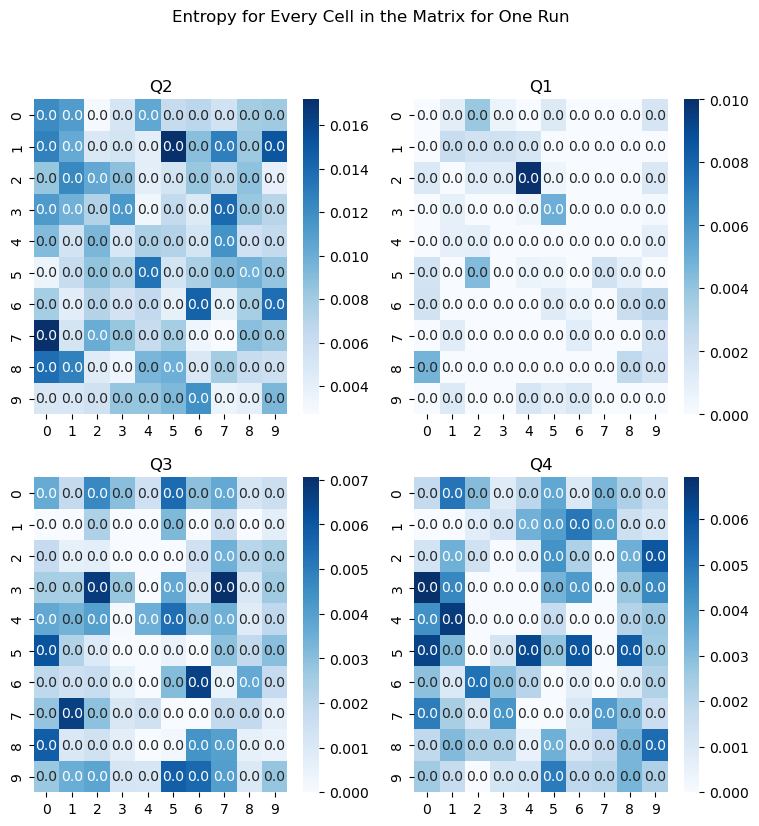

<Figure size 800x800 with 0 Axes>

In [40]:
data_100 = entropies[:100]
data_200 = entropies[100:200]
data_300 = entropies[200:300]
data_400 = entropies[300:400]



q1 = np.reshape(data_100,(10,10))
q2 = np.reshape(data_200,(10,10))
q3 = np.reshape(data_300,(10,10))
q4 = np.reshape(data_400,(10,10))

figure,axis = plt.subplots(2,2, figsize=(9,9))
plt.figure(figsize=(8, 8))
sns.heatmap(q1, annot=True, fmt=".1f", cmap="Blues", ax=axis[0,1],vmin=0,vmax=0.01)
axis[0,1].set_title("Q1")
sns.heatmap(q2, annot=True, fmt=".1f", cmap="Blues", ax=axis[0,0])
axis[0,0].set_title("Q2")
sns.heatmap(q3, annot=True, fmt=".1f", cmap="Blues", ax=axis[1,0])
axis[1,0].set_title("Q3")
sns.heatmap(q4, annot=True, fmt=".1f", cmap="Blues",  ax=axis[1,1])
axis[1,1].set_title("Q4")
figure.suptitle("Entropy for Every Cell in the Matrix for One Run")
plt.show()

In [32]:
entropy=0
entropies=[0] * 401
num_df = 150
strong_entropies = [] 
for df_counter in range(0, num_df):
   if df_counter%20==0:
        print(df_counter)
   df = pd.read_csv(r'C:\Users\matth\PhD\Fall 2024\SSIE 501-SSE 440\Programming\ScrapingOutput\DataCollector4\blackbox_'+str(df_counter)+'.csv')
   X = df.iloc[:,396]
   for i in range(1,df.shape[1]):
      Y = df.iloc[:,i]
      entropies[i-1]+=float(transfer_entropy(X.replace(colors_to_numbers),Y.replace(colors_to_numbers),k=5))

entropies = [entropy/num_df for entropy in entropies]

0
20
40
60
80
100
120
140


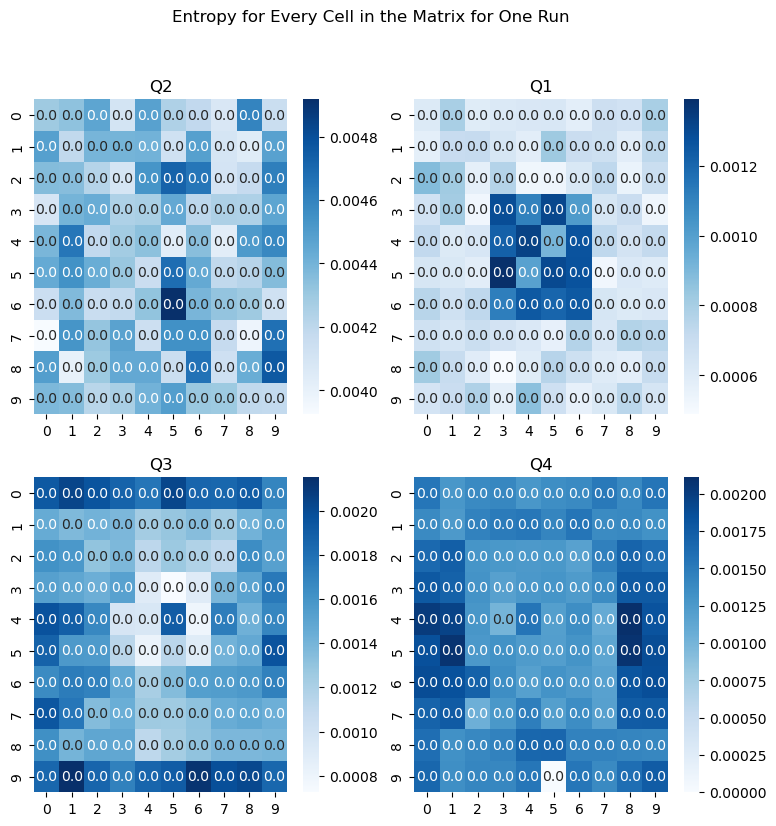

<Figure size 800x800 with 0 Axes>

In [33]:
data_100 = entropies[:100]
data_200 = entropies[100:200]
data_300 = entropies[200:300]
data_400 = entropies[300:400]



q1 = np.reshape(data_100,(10,10))
q2 = np.reshape(data_200,(10,10))
q3 = np.reshape(data_300,(10,10))
q4 = np.reshape(data_400,(10,10))

figure,axis = plt.subplots(2,2, figsize=(9,9))
plt.figure(figsize=(8, 8))
sns.heatmap(q1, annot=True, fmt=".1f", cmap="Blues", ax=axis[0,1])
axis[0,1].set_title("Q1")
sns.heatmap(q2, annot=True, fmt=".1f", cmap="Blues", ax=axis[0,0])
axis[0,0].set_title("Q2")
sns.heatmap(q3, annot=True, fmt=".1f", cmap="Blues", ax=axis[1,0])
axis[1,0].set_title("Q3")
sns.heatmap(q4, annot=True, fmt=".1f", cmap="Blues",  ax=axis[1,1])
axis[1,1].set_title("Q4")
figure.suptitle("Entropy for Every Cell in the Matrix for One Run")
plt.show()

0
20
40
60
80
100
120
140


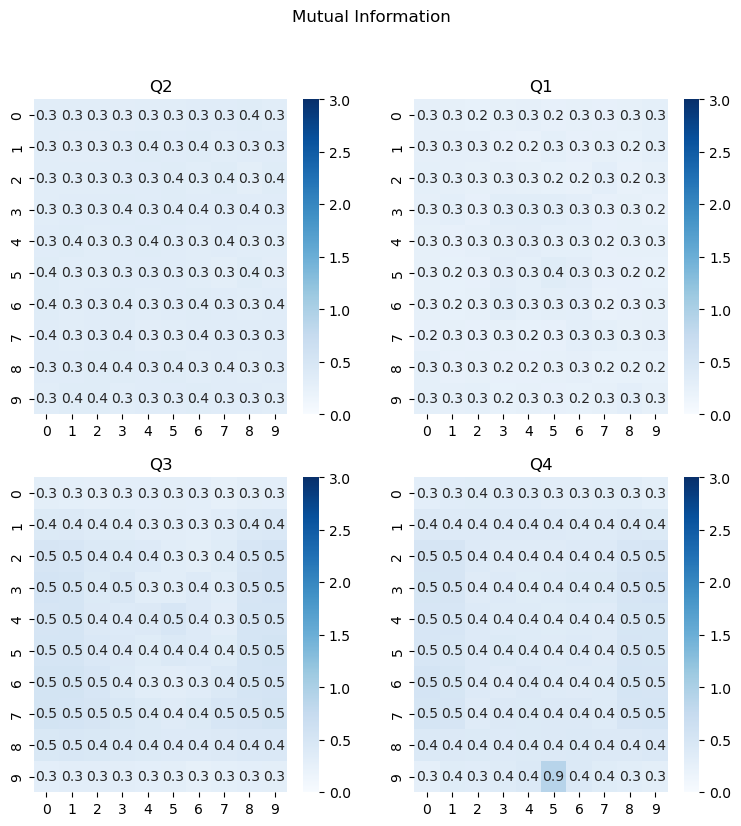

<Figure size 800x800 with 0 Axes>

In [60]:
entropy=0
entropies=[0] * 401
num_df = 150
strong_entropies = [] 
for df_counter in range(0, num_df):
   if df_counter%20==0:
        print(df_counter)
   df = pd.read_csv(r'C:\Users\matth\PhD\Fall 2024\SSIE 501-SSE 440\Programming\ScrapingOutput\DataCollector4\blackbox_'+str(df_counter)+'.csv')
   X = df.iloc[:,396]
   for i in range(1,df.shape[1]):
      Y = df.iloc[:,i]
      entropies[i-1]+=float(mutual_info(X.replace(colors_to_numbers),Y.replace(colors_to_numbers)))

entropies = [entropy/num_df for entropy in entropies]

data_100, = entropies[:100]
data_200 = entropies[100:200]
data_300 = entropies[200:300]
data_400 = entropies[300:400]



q1 = np.reshape(data_100,(10,10))
q2 = np.reshape(data_200,(10,10))
q3 = np.reshape(data_300,(10,10))
q4 = np.reshape(data_400,(10,10))

figure,axis = plt.subplots(2,2, figsize=(9,9))
plt.figure(figsize=(8, 8))
sns.heatmap(q1, annot=True, fmt=".1f", cmap="Blues", ax=axis[0,1], vmin=0, vmax=3)
axis[0,1].set_title("Q1")
sns.heatmap(q2, annot=True, fmt=".1f", cmap="Blues", ax=axis[0,0], vmin=0, vmax=3)
axis[0,0].set_title("Q2")
sns.heatmap(q3, annot=True, fmt=".1f", cmap="Blues", ax=axis[1,0], vmin=0, vmax=3)
axis[1,0].set_title("Q3")
sns.heatmap(q4, annot=True, fmt=".1f", cmap="Blues",  ax=axis[1,1], vmin=0, vmax=3)
axis[1,1].set_title("Q4")
figure.suptitle("Mutual Information")
plt.show()

In [43]:
df.columns[396]

'Q4-pos395'

In [45]:
strong_entropies = [] 
entropies = [] 

#x is the original, y is the one we are comparing to
for i in range(1,df.shape[1]):
    entropies = []
    X = df.iloc[:,i]
    for j in range(1,df.shape[1]):
        if i == j:
            entropies.append(0)
        Y = df.iloc[:,j]
        xfer_entropy = transfer_entropy(X,Y)
        if xfer_entropy > 1.75:
            strong_entropies.append(str(df.columns[i])+','+str(df.columns[j]))
            #print('Strong Connection Identified!')
        entropies.append(xfer_entropy)
    #print(f'Calcualting the Transfer Entropy For Cell {i}')
#strong_entropies
            

TypeError: transfer_entropy() missing 1 required positional argument: 'k'

In [8]:
entropy=0
#entropies=[0] * 401
num_df = 10
strong_mutual_info = [] 
for df_counter in range(0, num_df):
        df = pd.read_csv(r'C:\Users\matth\PhD\Fall 2024\SSIE 501-SSE 440\Programming\ScrapingOutput\DataCollector4\blackbox_'+str(df_counter)+'.csv')
        for i in range(1,df.shape[1]):
            mutual_info_list = []
            X = (df.iloc[:,i])
            for j in range(1,df.shape[1]):
                Y = (df.iloc[:,j])
                mutual_info_num = mutual_info(X.replace(colors_to_numbers),Y.replace(colors_to_numbers))
                if mutual_info_num > 1.1:
                    strong_mutual_info.append(str(df.columns[i])+','+str(df.columns[j])+'DataFrame'+str(df_counter))
                    #print('Strong Connection Identified!')
                mutual_info_list.append(mutual_info_num)
#    if df_counter%20==0:
#         print(df_counter)
#    df = pd.read_csv(r'C:\Users\matth\PhD\Fall 2024\SSIE 501-SSE 440\Programming\ScrapingOutput\DataCollector4\blackbox_'+str(df_counter)+'.csv')
#    X = df.iloc[:,396]
#    for i in range(1,df.shape[1]):
#       Y = df.iloc[:,i]
#   entropies[i-1]+=float(mutual_info(X.replace(colors_to_numbers),Y.replace(colors_to_numbers)))


KeyboardInterrupt: 

In [13]:
X = (df.iloc[:,1])
Y = (df.iloc[:,3])

mutual_info_num = mutual_info(X.replace(colors_to_numbers),Y.replace(colors_to_numbers))
mutual_info_num

0.13745469678588418

In [58]:
#print([*(zip(X,Y))])
mi_list= Counter(zip(X,Y))

time_steps = 20001


total_mi = 0.0
for pair,count in mi_list.items():
    px_py = count/2001
    #print(pair)
    count_x = Counter(X)[pair[0]]
    count_y = Counter(Y)[pair[1]]
    #print(count_x)
    #print(count_y)
    
    #print(count)

    total_mi += (px_py * math.log2((px_py)/((count_x/2001)*(count_y/2001))))
    #print( '----------------')


total_mi

0.13745469678588407

In [44]:
Counter(X)['mex']
# for x_color,x_count in Counter(X).items():
#     print(f'X Color {x_color}')
#     print(f'X Count {x_count}')
#     for y_color,y_count in Counter(Y).items():
#         print(f'Y Color {y_color}')
#         print(f'Y Count {y_count}')
#         print('----------')

240